# Databricks File System (DBFS)

- Databricks File System (DBFS) is a distributed file system mounted into an Azure Databricks workspace and available on Azure Databricks clusters
- DBFS is an abstraction on top of scalable object storage and offers the following benefits:
    - Allows you to mount storage objects so that you can seamlessly access data without requiring credentials.
    - Allows you to interact with object storage using directory and file semantics instead of storage URLs.
    -Persists files to object storage, so you won’t lose data after you terminate a cluster.

## Important information about DBFS permissions

- All users have read and write access to the objects in object storage mounted to DBFS

## DBFS root

- The default storage location in DBFS is known as the DBFS root. Several types of data are stored in the following DBFS root locations:

    - /FileStore: Imported data files, generated plots, and uploaded libraries.
    - /databricks-datasets: Sample public datasets. See Special DBFS root locations.
    - /databricks-results: Files generated by downloading the full results of a query.
    - /databricks/init: Global and cluster-named (deprecated) init scripts.
    - /user/hive/warehouse: Data and metadata for non-external Hive tables.

- In a new workspace, the DBFS root has the following default folders:

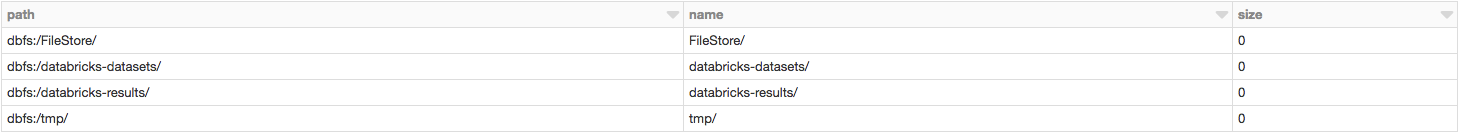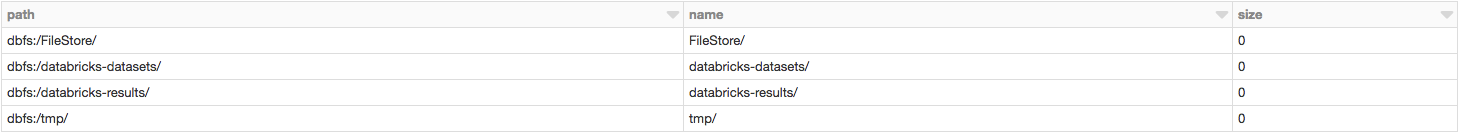

## Mount object storage to DBFS

- Mounting object storage to DBFS allows you to access objects in object storage as if they were on the local file system.

## Access DBFS

- The path to the default blob storage (root) is dbfs:/.

- The default location for %fs and dbutils.fs is root. Thus, to read from or write to root or an external bucket:

In [4]:
# Default location for %fs is root
%fs ls /tmp/
%fs mkdirs /tmp/my_cloud_dir
%fs cp /tmp/test_dbfs.txt /tmp/file_b.txt

UsageError: Line magic function `%fs` not found.


In [5]:
# Default location for dbutils.fs is root
dbutils.fs.ls ("/tmp/")
dbutils.fs.put("/tmp/my_new_file", "This is a file in cloud storage.")

NameError: name 'dbutils' is not defined

In [ ]:
# Default location for os commands is the local filesystem
import os
os.listdir('/dbfs/tmp')

## Access files on the local filesystem

- %fs and dbutils.fs read by default from root (dbfs:/). To read from the local filesystem, you must use file:/.

In [ ]:
# With %fs and dbutils.fs, you must use file:/ to read from local filesystem
%fs ls file:/tmp
%fs mkdirs file:/tmp/my_local_dir
dbutils.fs.ls ("file:/tmp/")
dbutils.fs.put("file:/tmp/my_new_file", "This is a file on the local driver node.")

## Access files on mounted object storage

- Mounting object storage to DBFS allows you to access objects in object storage as if they were on the local file system.

In [ ]:
dbutils.fs.ls("/mnt/mymount")
df = spark.read.text("dbfs:/mymount/my_file.txt")

## File upload interface

- If you have small data files on your local machine that you want to analyze with Azure Databricks, you can easily import them to Databricks File System (DBFS) using one of the two file upload interfaces:
    - from the DBFS file browser or 
    - from a notebook.

- Files are uploaded to the FileStore directory.

## Upload data to DBFS from the file browser
- This feature is disabled by default. An administrator must enable the DBFS browser interface before you can use it.

- Click Data Icon Data in the sidebar.
- Click the DBFS button at the top of the page.
- Click the Upload button at the top of the page.
- On the Upload Data to DBFS dialog, optionally select a target directory or enter a new one.
- In the Files box, drag and drop or use the file browser to select the local file to upload.
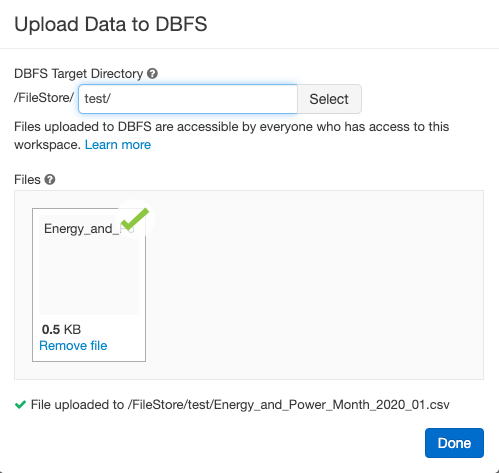

- Uploaded files are accessible by everyone who has access to the workspace.

## Upload data to DBFS from a notebook
- This feature is enabled by default. If an administrator has disabled this feature, you will not have the option to upload files.

- Create a new notebook or open an existing one, then click File > Upload Data
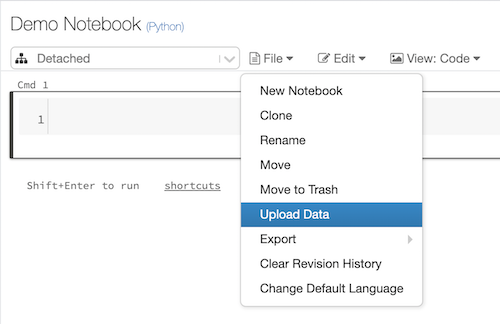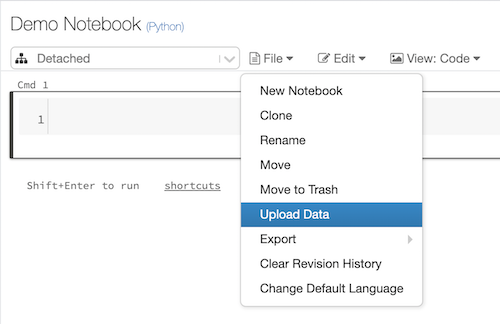

- Select a target directory in DBFS to store the uploaded file. The target directory defaults to /shared_uploads/<your-email-address>/.
    - Uploaded files are accessible by everyone who has access to the workspace.
- Either drag files onto the drop target or click Browse to locate files in your local filesystem.

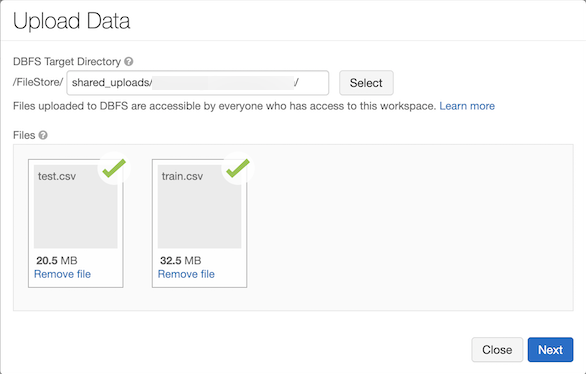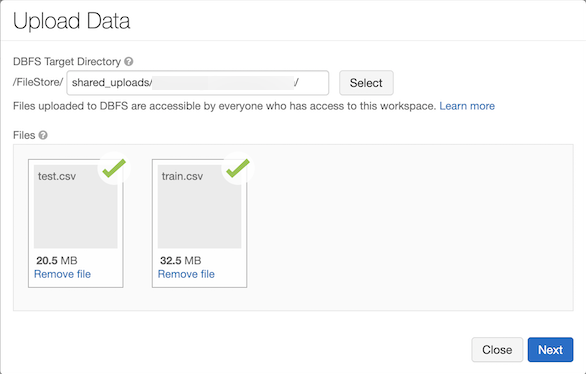

- When you have finished uploading the files, click Next.
    - If you’ve uploaded CSV, TSV, or JSON files, Azure Databricks generates code showing how to load the data into a DataFrame.

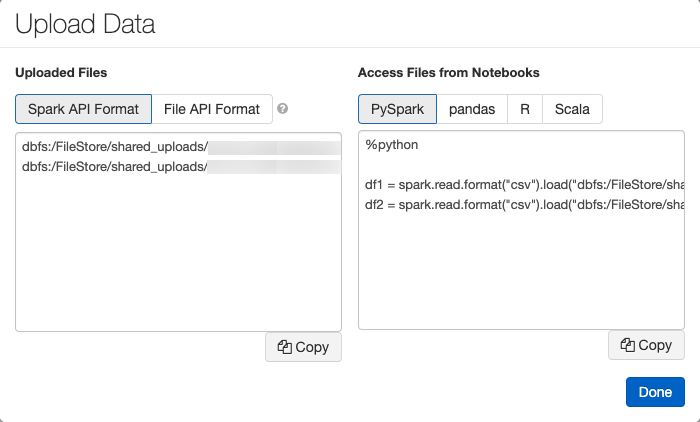

- To save the text to your clipboard, click Copy.


- Click Done to return to the notebook.

## Databricks CLI

In [10]:
# List files in DBFS
dbfs ls
# Put local file ./apple.txt to dbfs:/apple.txt
dbfs cp ./apple.txt dbfs:/apple.txt
# Get dbfs:/apple.txt and save to local file ./apple.txt
dbfs cp dbfs:/apple.txt ./apple.txt
# Recursively put local dir ./banana to dbfs:/banana
dbfs cp -r ./banana dbfs:/banana

SyntaxError: invalid syntax (3387470145.py, line 2)

## dbutils
- dbutils.fs provides file-system-like commands to access files in DBFS.
- To access the help menu for DBFS, use the dbutils.fs.help() command.

### Write files to and read files from the DBFS root as if it were a local filesystem

In [ ]:
dbutils.fs.mkdirs("/foobar/")

In [ ]:
dbutils.fs.put("/foobar/baz.txt", "Hello, World!")

In [ ]:
dbutils.fs.head("/foobar/baz.txt")

In [ ]:
dbutils.fs.rm("/foobar/baz.txt")

### Use dbfs:/ to access a DBFS path

In [ ]:
display(dbutils.fs.ls("dbfs:/foobar"))

### Use %fs magic commands

In [ ]:
# List the DBFS root

%fs ls

# Recursively remove the files under foobar

%fs rm -r foobar

# Overwrite the file "/mnt/my-file" with the string "Hello world!"

%fs put -f "/mnt/my-file" "Hello world!"

## DBFS API

- The following example writes the file foo.text to the DBFS /tmp directory.

In [ ]:
df.write.text("/tmp/foo.txt")

- To read a file named people.json in the DBFS location /FileStore, you can specify either of the following:

In [ ]:
df = spark.read.json('dbfs:/FileStore/people.json')
df.show()

In [ ]:
df = spark.read.json('/FileStore/people.json')
df.show()

- The following does not work:

In [12]:
# This will not work. The path must be absolute. It
# must start with '/' or 'dbfs:/'.
df = spark.read.json('FileStore/people.json')
df.show()

NameError: name 'spark' is not defined

## Local file APIs

- You can use local file APIs to read and write to DBFS paths.
- Azure Databricks configures each cluster node with a FUSE mount /dbfs that allows processes running on cluster nodes to read and write to the underlying distributed storage layer with local file APIs.
- When using local file APIs, you must provide the path under /dbfs. For example:

In [ ]:
#write a file to DBFS using Python file system APIs
with open("/dbfs/tmp/test_dbfs.txt", 'w') as f:
  f.write("Apache Spark is awesome!\n")
  f.write("End of example!")

# read the file
with open("/dbfs/tmp/test_dbfs.txt", "r") as f_read:
  for line in f_read:
    print(line)